# Insurance Fraud Detection


## Business Problem

Claim related fraud is a huge problem in the insurance industry. It is quite complex and difficult to identify those unwanted claims. With Random Forest Non-Parametric Machine Learning Algorithm, I am trying to troubleshoot and help the General Insurance industry with this problem.

The data that I have is from Automobile Insurance. I will be creating a predictive model that predicts if an insurance claim is fraudulent or not. The answere between YES/NO, is a Binary Classification task. A comparison study has been performed to understand which ML algorithm suits best to the dataset.


In [1]:
# Importing Basic Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
!pip install xgboost
from xgboost import XGBClassifier

In [2]:
# Loading the dataset 
df = pd.read_csv('insurance_data.csv')
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [3]:
#Dropping the Columns that are not used in our project
to_drop = ['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date',
           'incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year', '_c39']

df.drop(to_drop, inplace = True, axis = 1)

In [4]:
# Checking for null values
df.isnull().sum()

months_as_customer             0
age                            0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_claim                 0
vehicle_claim                  0
fraud_reported                 0
dtype: int64

In [5]:
df.replace('?',np.nan,inplace=True)

In [6]:
df.describe()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,1136.000000,1256.406150,1.101000e+06,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000
std,115.113174,9.140287,611.864673,244.167395,2.297407e+06,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893
min,0.000000,19.000000,500.000000,433.330000,-1.000000e+06,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000
25%,115.750000,32.000000,500.000000,1089.607500,0.000000e+00,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000
50%,199.500000,38.000000,1000.000000,1257.200000,0.000000e+00,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000
75%,276.250000,44.000000,2000.000000,1415.695000,0.000000e+00,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000
max,479.000000,64.000000,2000.000000,2047.590000,1.000000e+07,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000


In [7]:
# to find null values in the given dataset 
df.isnull().sum()/df.shape[0]*100

months_as_customer              0.0
age                             0.0
policy_csl                      0.0
policy_deductable               0.0
policy_annual_premium           0.0
umbrella_limit                  0.0
insured_sex                     0.0
insured_education_level         0.0
insured_occupation              0.0
insured_relationship            0.0
capital-gains                   0.0
capital-loss                    0.0
incident_type                   0.0
collision_type                 17.8
incident_severity               0.0
authorities_contacted           0.0
incident_hour_of_the_day        0.0
number_of_vehicles_involved     0.0
property_damage                36.0
bodily_injuries                 0.0
witnesses                       0.0
police_report_available        34.3
total_claim_amount              0.0
injury_claim                    0.0
property_claim                  0.0
vehicle_claim                   0.0
fraud_reported                  0.0
dtype: float64

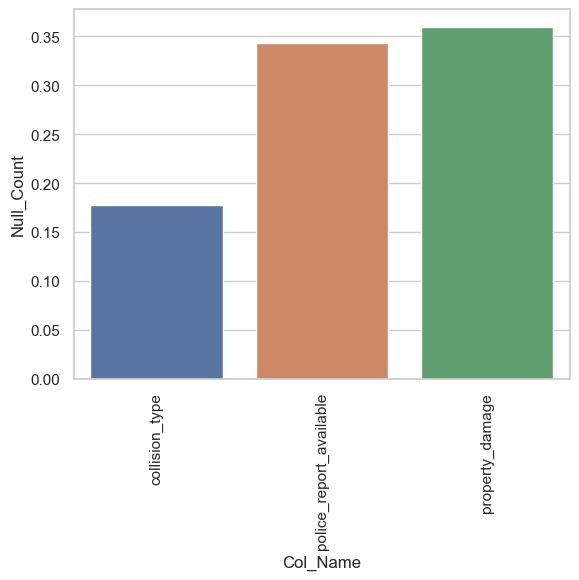

In [8]:
missing = df.isnull().sum() / len(df) # perncentage 
missing = missing[missing>0]
missing.sort_values(inplace=True)
missing = missing.to_frame()
missing.columns=['Null_Count']
missing.index.names=['Col_Name']
missing = missing.reset_index()
sns.set(style='whitegrid',color_codes=True)
sns.barplot(x='Col_Name',y='Null_Count',data=missing)
plt.xticks(rotation=90)
plt.show()

In [9]:
# Replacing the nan values by using mode method
df['collision_type'] = df['collision_type'].fillna(df['collision_type'].mode()[0])
df['property_damage'] = df['property_damage'].fillna(df['property_damage'].mode()[0])
df['police_report_available']= df['police_report_available'].fillna(df['police_report_available'].mode()[0])

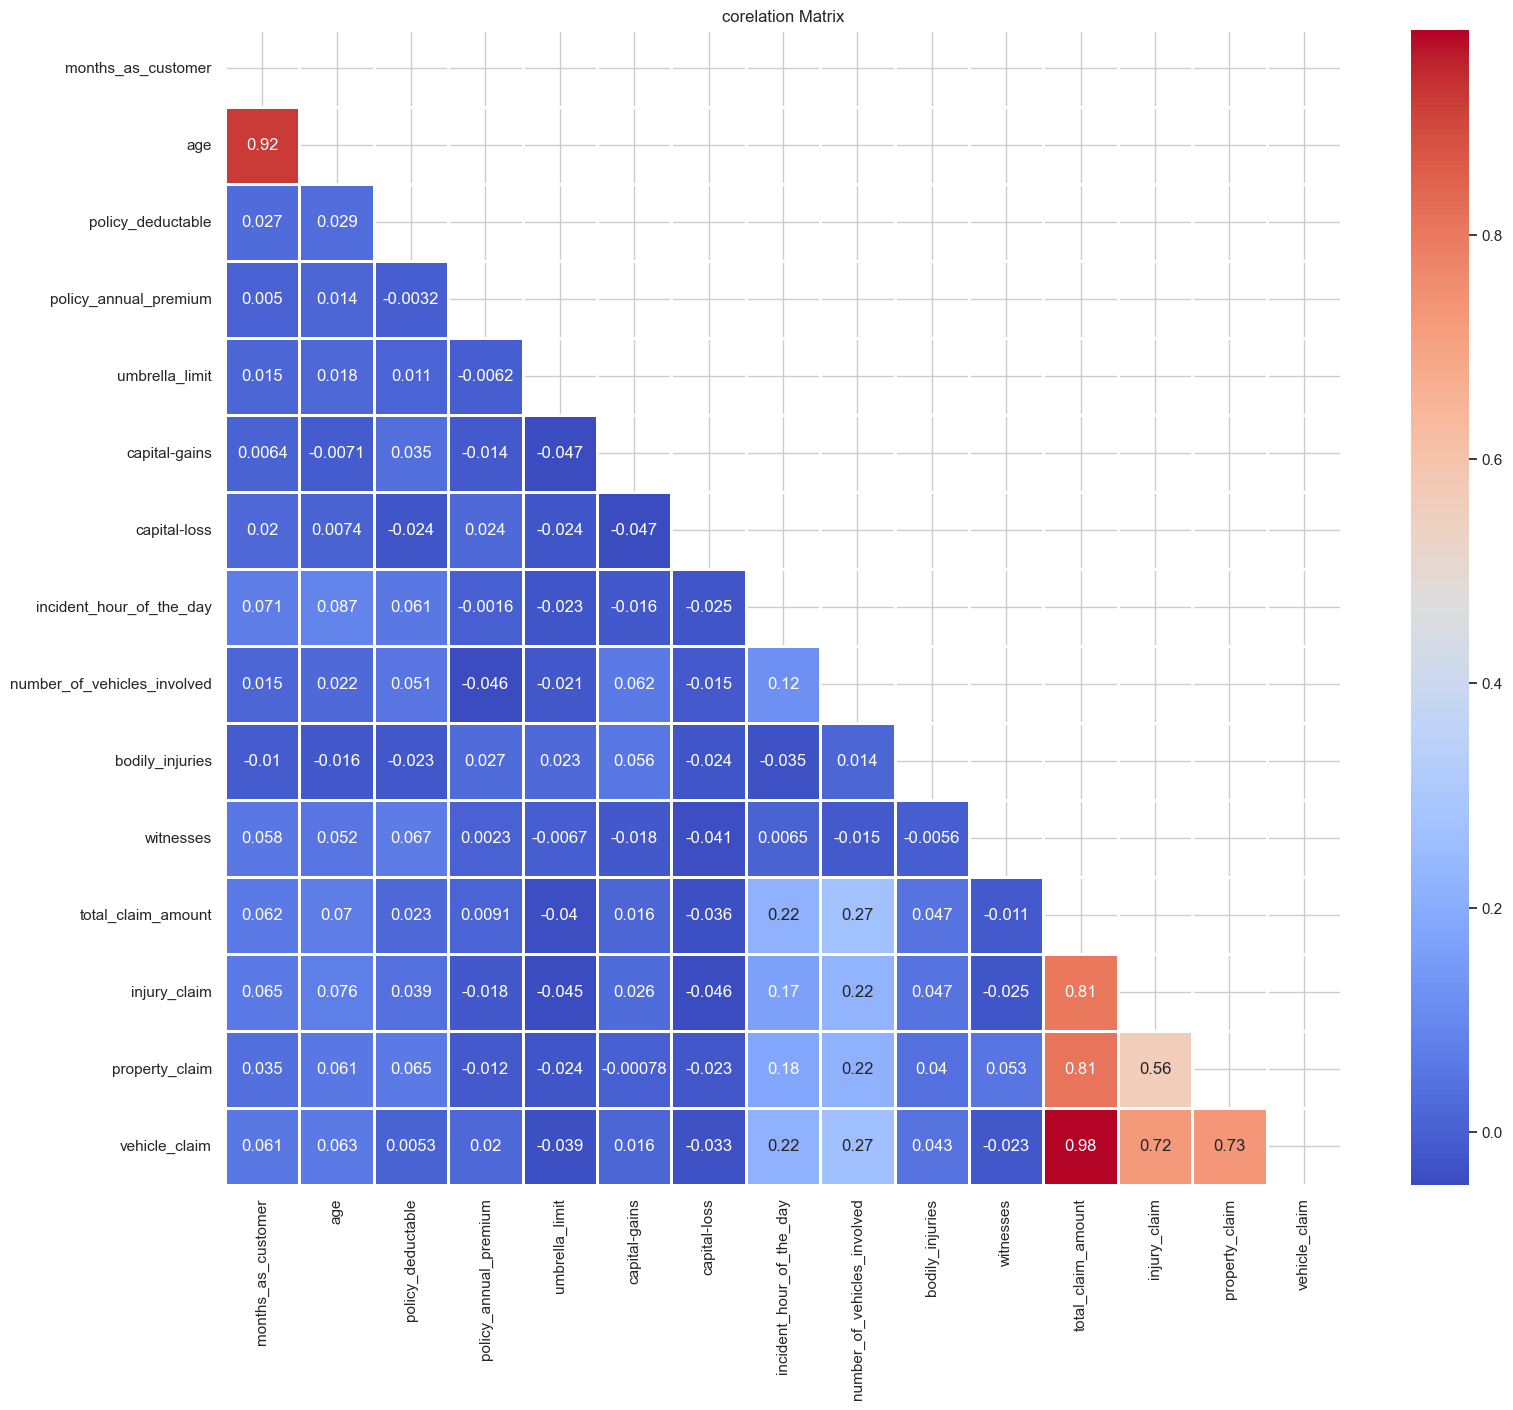

In [10]:
plt.figure(figsize = (18, 15))

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(df.corr(),annot=True,cmap='coolwarm',fmt = '.2g', linewidth = 1,mask =mask)#annotation=true means to show values
plt.title('corelation Matrix')
plt.show()

#### High Correlation in 'age' and 'month_as_customer' columns, along with columns like - 'total_claim_amount','injury_claim','property_claim', 'vehicle_claim'. So removing columns 'age' and 'total_claim_amount' to change the correction between them, Other I don't delete because we need others in our model

In [11]:
df.drop(columns= ['age','total_claim_amount'],inplace=True,axis=1)

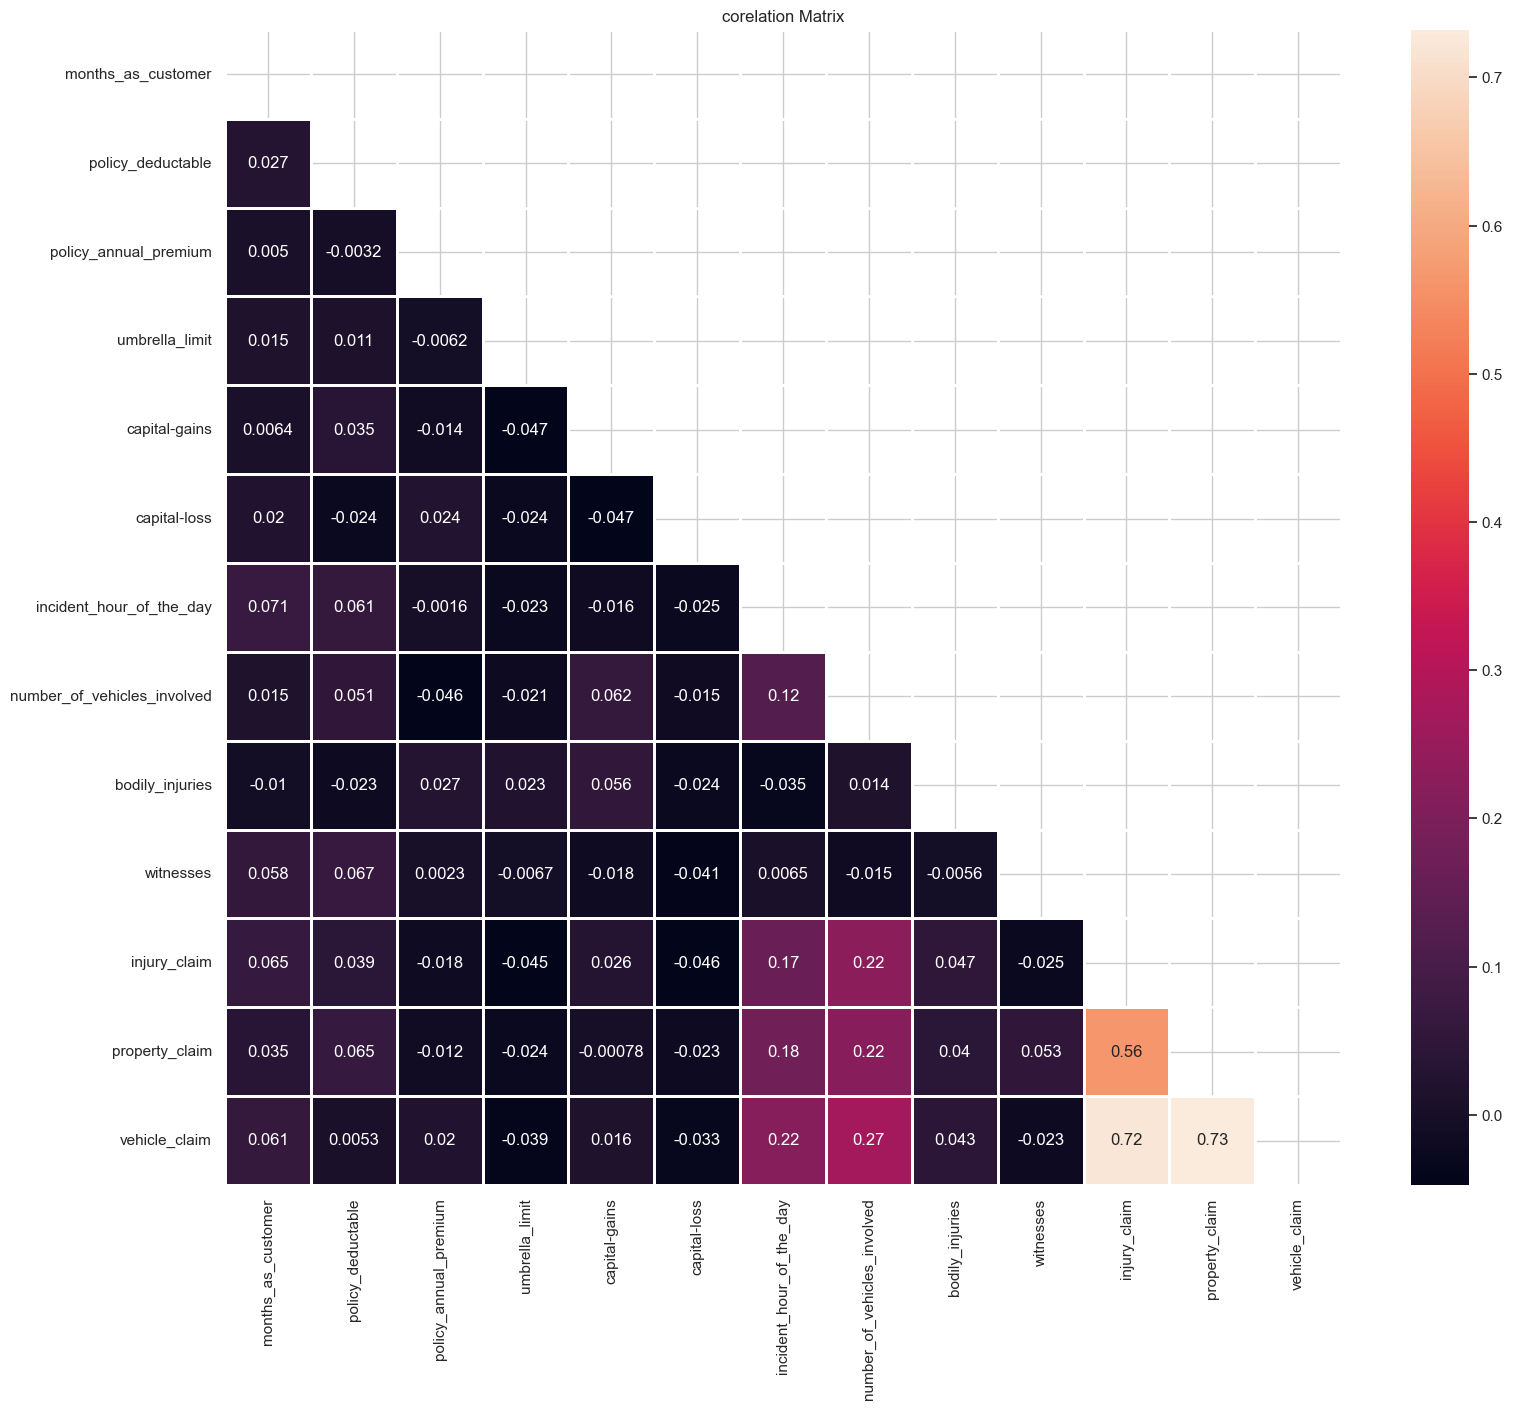

In [12]:
plt.figure(figsize = (18, 15))

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(df.corr(),annot=True,fmt = '.2g', linewidth = 1,mask =mask)#annotation=true means to show values
plt.title('corelation Matrix')
plt.show()

In [13]:
# selecting input and output
x= df.drop('fraud_reported',axis=1)
y = df['fraud_reported']

In [14]:
# converting label columns into numerical by one hot encoding 
df_cat = x.select_dtypes(include=['object'])
df_cat = pd.get_dummies(df_cat,drop_first = True)
df_cat.head()

,policy_csl_250/500,policy_csl_500/1000,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,...,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
0,1,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,1,1
1,1,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
4,0,1,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [15]:
# create a dataset df_num dataframe which will hold all kind of numerical data types
df_num = df.select_dtypes(['int64'])
x = pd.concat([df_num,df_cat],axis=1)

In [16]:
x.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
0,328,1000,0,53300,0,5,1,1,2,6510,...,1,0,0,0,0,0,0,1,1,1
1,228,2000,5000000,0,0,8,1,0,0,780,...,0,1,0,0,0,0,0,1,0,0
2,134,2000,5000000,35100,0,7,3,2,3,7700,...,0,1,0,0,0,0,0,1,0,0
3,256,2000,6000000,48900,-62400,5,1,1,2,6340,...,0,0,0,0,0,0,0,1,0,0
4,228,1000,6000000,66000,-46000,20,1,0,1,1300,...,0,1,0,0,0,1,0,0,0,0


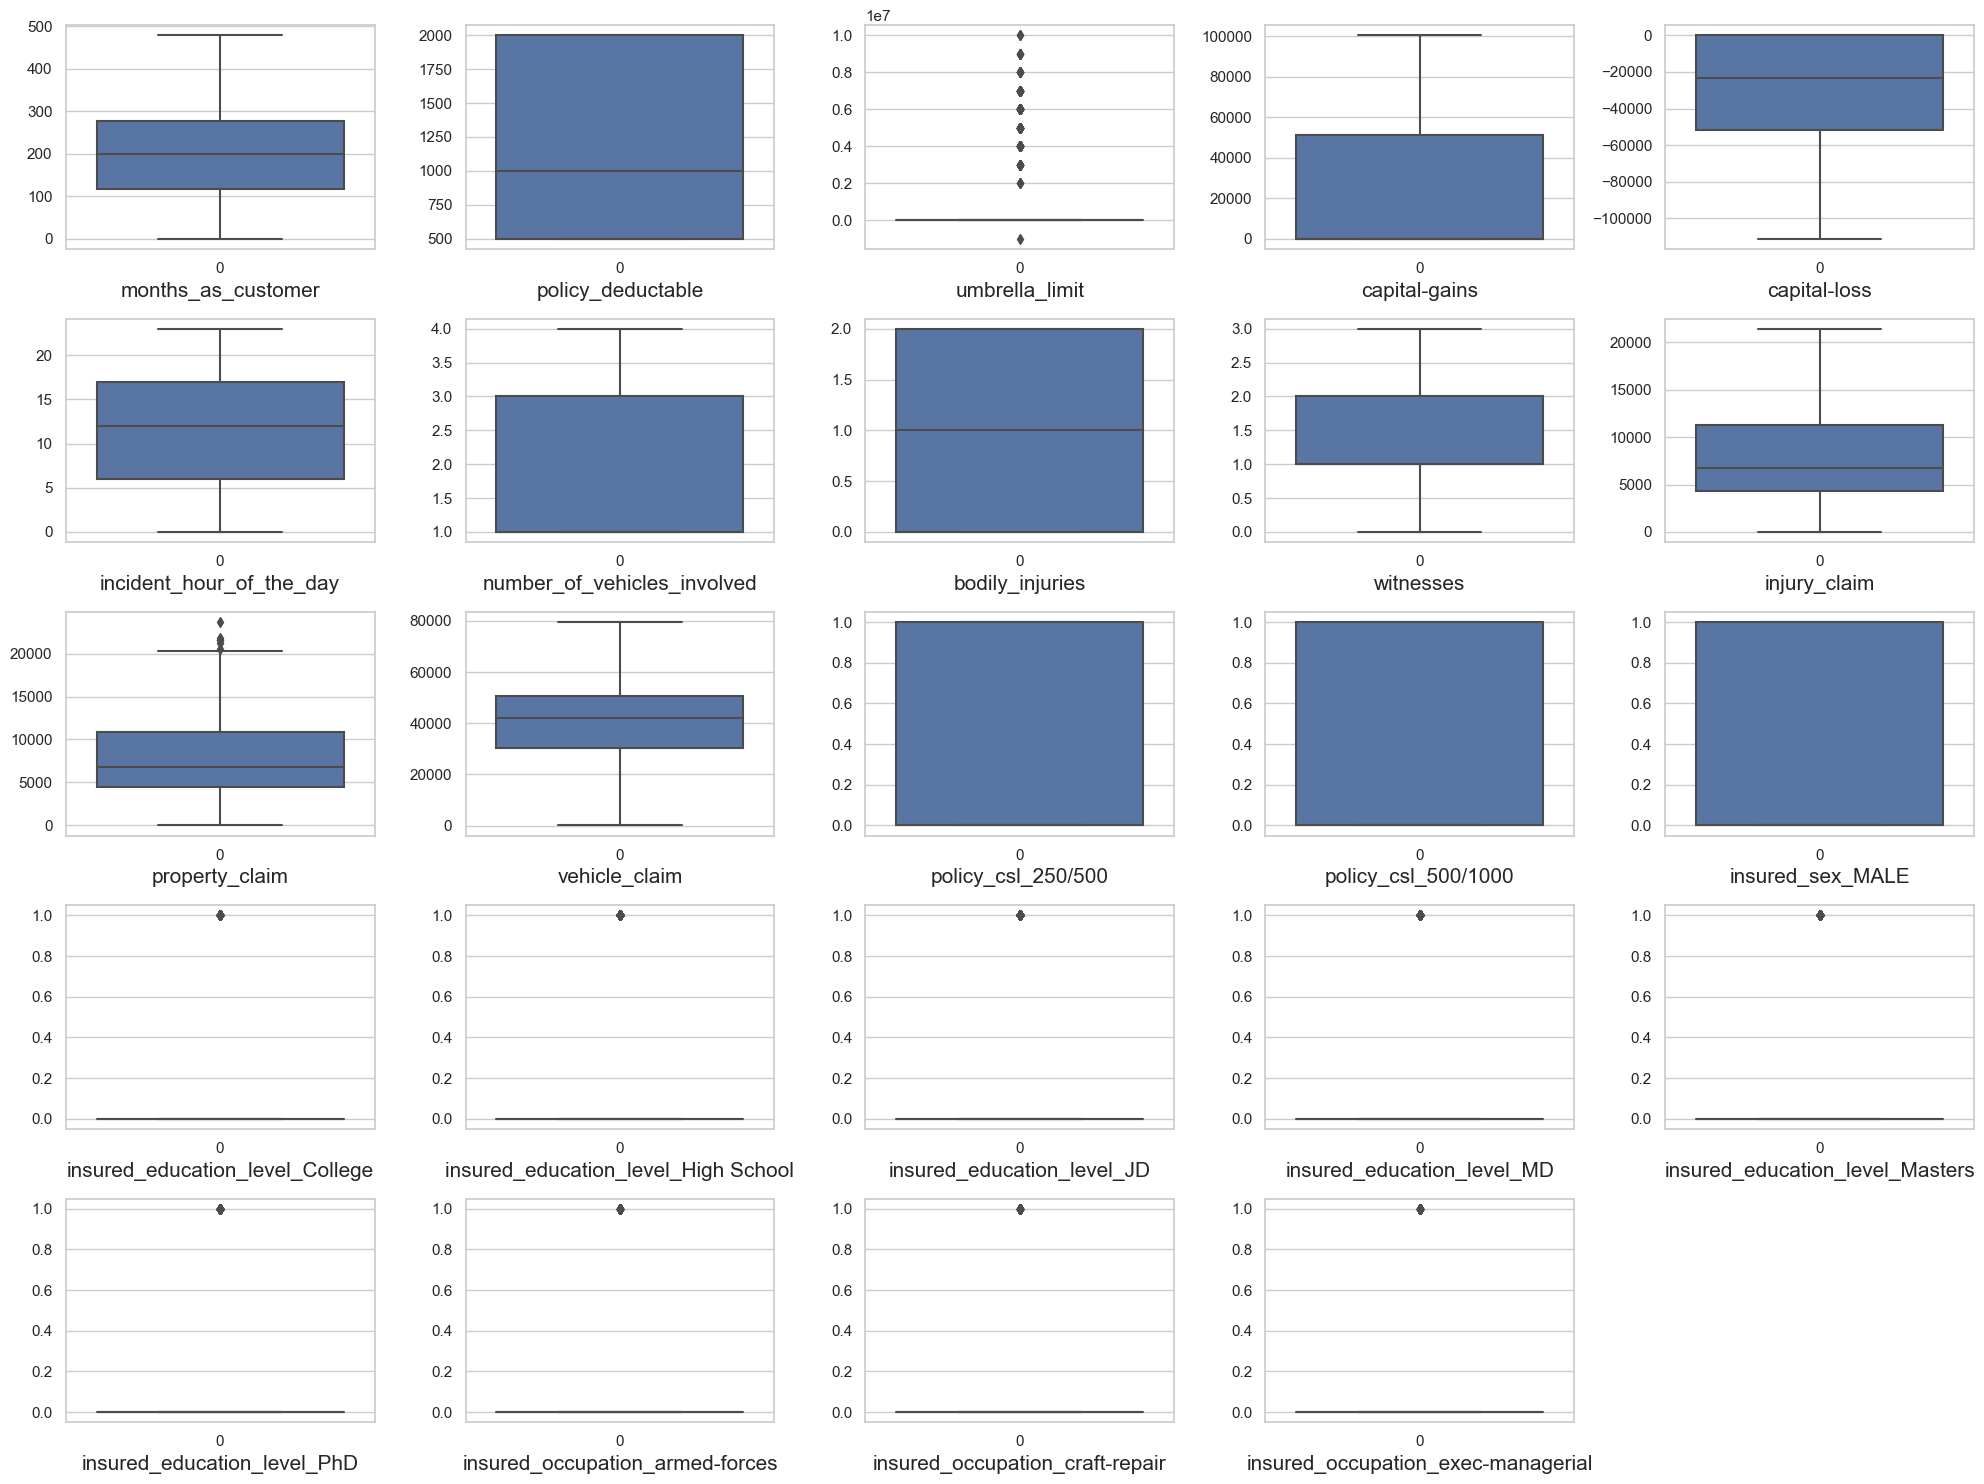

In [17]:
# checking outlier
plt.figure(figsize = (20,15))
pltno = 1

for col in x.columns:
    if pltno <=24:
        ax = plt.subplot(5,5,pltno)
        sns.boxplot(x[col])
        plt.xlabel(col,fontsize = 15)
        
    pltno += 1
plt.tight_layout()
plt.show()

### Outliers are in there, so we need to standardise those columns using standard scaler

In [18]:
# training the dataset
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [19]:
x_train.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
220,246,2000,0,0,-58600,18,1,1,2,11160,...,0,0,0,0,0,0,1,0,1,1
171,119,2000,0,88800,0,1,1,0,1,6700,...,0,0,1,0,0,0,0,0,0,1
844,273,1000,0,59600,0,0,3,1,3,7960,...,1,1,0,0,0,0,0,1,0,0
766,224,1000,0,0,-47100,21,3,2,1,12360,...,0,0,1,0,1,0,0,0,1,0
796,421,500,4000000,49500,-81100,7,1,2,3,16860,...,0,0,0,0,0,0,0,0,0,0


In [20]:
df_num = x_train[['months_as_customer', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'injury_claim', 'property_claim',
       'vehicle_claim']]

In [21]:
# standardization
ss = StandardScaler()
scaled_data = ss.fit_transform(df_num)

In [22]:
scaled_num = pd.DataFrame(data = scaled_data,columns =df_num.columns,index = x_train.index)
scaled_num.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
651,-0.855845,-0.254956,-0.478966,-0.904352,-1.735260,-0.081113,1.130388,-0.007643,-0.456348,0.058035,1.697638,0.877721
898,0.316171,-1.070816,-0.478966,0.986397,0.963589,1.630289,-0.835504,-1.230514,-0.456348,-1.527313,0.930932,0.508130
372,-0.628439,1.376763,-0.478966,0.925978,0.963589,-0.651581,-0.835504,-0.007643,1.359963,1.231233,-0.121735,0.861423
350,0.429874,-0.254956,-0.478966,0.798033,-1.684747,1.487672,-0.835504,-0.007643,1.359963,1.121055,1.167160,0.065461
280,0.508592,-0.254956,-0.478966,-0.904352,-2.063596,0.061504,1.130388,-0.007643,1.359963,0.055995,0.085483,-0.349869


In [23]:
x_train.drop(columns = scaled_num.columns,inplace = True)

In [24]:
x_train = pd.concat([scaled_num,x_train],axis=1)

In [25]:
x_train.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
651,-0.855845,-0.254956,-0.478966,-0.904352,-1.735260,-0.081113,1.130388,-0.007643,-0.456348,0.058035,...,0,1,0,0,0,0,0,1,1,0
898,0.316171,-1.070816,-0.478966,0.986397,0.963589,1.630289,-0.835504,-1.230514,-0.456348,-1.527313,...,0,0,0,0,0,0,0,1,0,0
372,-0.628439,1.376763,-0.478966,0.925978,0.963589,-0.651581,-0.835504,-0.007643,1.359963,1.231233,...,0,0,1,0,0,0,1,0,0,0
350,0.429874,-0.254956,-0.478966,0.798033,-1.684747,1.487672,-0.835504,-0.007643,1.359963,1.121055,...,1,1,0,0,0,0,1,0,1,0
280,0.508592,-0.254956,-0.478966,-0.904352,-2.063596,0.061504,1.130388,-0.007643,1.359963,0.055995,...,1,1,0,0,1,0,0,0,0,0


# Modelling 

## Support Vector Classifer

In [57]:
# Importing svc model
svc_model = SVC()
svc_model.fit(x_train,y_train)

y_pred = svc_model.predict(x_test)

In [58]:
# Traning & testing the dataset and importing confusion_matrix & classification_report

svc_model_train = accuracy_score(y_train,svc_model.predict(x_train))
svc_model_test = accuracy_score(y_test,y_pred)

print('Training Accuracy:',svc_model_train)
print('Testing Accuracy:',svc_model_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Training Accuracy: 0.7475
Testing Accuracy: 0.775
[[155   0]
 [ 45   0]]
              precision    recall  f1-score   support

           0       0.78      1.00      0.87       155
           1       0.00      0.00      0.00        45

    accuracy                           0.78       200
   macro avg       0.39      0.50      0.44       200
weighted avg       0.60      0.78      0.68       200



# Decision Tree Classifer

In [59]:
# Importing decision tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train,y_train)

y_pred = decision_tree.predict(x_test)

In [60]:
# Traning & testing the dataset and importing confusion_matrix & classification_report

decision_tree_train = accuracy_score(y_train,decision_tree.predict(x_train))
decision_tree_test = accuracy_score(y_test,y_pred)

print('Training Accuracy:',decision_tree_train)
print('Testing Accuracy:',decision_tree_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Training Accuracy: 1.0
Testing Accuracy: 0.74
[[132  23]
 [ 29  16]]
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       155
           1       0.41      0.36      0.38        45

    accuracy                           0.74       200
   macro avg       0.62      0.60      0.61       200
weighted avg       0.73      0.74      0.73       200



### Grid search cv

In [ ]:
#Importing Grid search cv
grid_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'min_samples_split' : range(2, 10, 1),
    'min_samples_leaf' : range(2, 10, 1)
}

grid_search = GridSearchCV(decision_tree, grid_params, cv = 5)
grid_search.fit(x_train, y_train)

In [29]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 3}
0.79125


In [30]:
decision_tree = grid_search.best_estimator_
y_pred = decision_tree.predict(x_test)

In [31]:
# Traning & testing the dataset and importing confusion_matrix & classification_report

decision_tree_train_cv = accuracy_score(y_train,decision_tree.predict(x_train))
decision_tree_test_cv = accuracy_score(y_test,y_pred)

print('Training Accuracy:',decision_tree_train_cv)
print('Testing Accuracy:',decision_tree_test_cv)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Training Accuracy: 0.80625
Testing Accuracy: 0.835
[[132  23]
 [ 10  35]]
              precision    recall  f1-score   support

           N       0.93      0.85      0.89       155
           Y       0.60      0.78      0.68        45

    accuracy                           0.83       200
   macro avg       0.77      0.81      0.78       200
weighted avg       0.86      0.83      0.84       200



## Random Forest Classifier 

In [32]:
# Importing Random Forest Classifier
rf_model = RandomForestClassifier(criterion = 'entropy',max_depth = 15,max_features='sqrt',min_samples_leaf = 1,min_samples_split=3,n_estimators = 140)
rf_model.fit(x_train,y_train)

y_pred = rf_model.predict(x_test)

In [33]:
# Traning & testing the dataset and importing confusion_matrix & classification_report

rf_model_train = accuracy_score(y_train,rf_model.predict(x_train))
rf_model_test = accuracy_score(y_test,y_pred)

print('Training Accuracy:',rf_model_train)
print('Testing Accuracy:',rf_model_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Training Accuracy: 1.0
Testing Accuracy: 0.78
[[148   7]
 [ 37   8]]
              precision    recall  f1-score   support

           N       0.80      0.95      0.87       155
           Y       0.53      0.18      0.27        45

    accuracy                           0.78       200
   macro avg       0.67      0.57      0.57       200
weighted avg       0.74      0.78      0.73       200



# Ada Boost Classifier

In [34]:
# Importing Ada Boost 

ada_model = AdaBoostClassifier(base_estimator = decision_tree)

parameters = {
    'n_estimators':[50,70,90,120,180,200],
    'learning_rate':[0.001,0.01,0.1,10],
}
grid_search = GridSearchCV(ada_model,parameters,cv=5)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                                                min_samples_leaf=5,
                                                                                min_samples_split=3)),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 10],
                         'n_estimators': [50, 70, 90, 120, 180, 200]})

In [35]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'learning_rate': 0.01, 'n_estimators': 70}
0.79375


In [36]:
ada_model = grid_search.best_estimator_
y_pred = ada_model.predict(x_test)

In [37]:
# Traning & testing the dataset and importing confusion_matrix & classification_report

ada_train = accuracy_score(y_train,ada_model.predict(x_train))
ada_test = accuracy_score(y_test,y_pred)

print('Training Accuracy:',ada_train)
print('Testing Accuracy:',ada_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Training Accuracy: 0.81
Testing Accuracy: 0.835
[[136  19]
 [ 14  31]]
              precision    recall  f1-score   support

           N       0.91      0.88      0.89       155
           Y       0.62      0.69      0.65        45

    accuracy                           0.83       200
   macro avg       0.76      0.78      0.77       200
weighted avg       0.84      0.83      0.84       200



# Gradient Boosting Classifier

In [ ]:
# Importing Gradient Boosting 
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)

In [39]:
gb_acc = accuracy_score(y_test,gb.predict(x_test))

In [40]:
# Traning & testing the dataset and importing confusion_matrix & classification_report

gb_train = accuracy_score(y_train,gb.predict(x_train))
gb_test = accuracy_score(y_test,gb.predict(x_test))

print('Training Accuracy:',gb_train)
print('Testing Accuracy:',gb_test)
print(confusion_matrix(y_test,gb.predict(x_test)))
print(classification_report(y_test,gb.predict(x_test)))


Training Accuracy: 0.92875
Testing Accuracy: 0.76
[[135  20]
 [ 28  17]]
              precision    recall  f1-score   support

           N       0.83      0.87      0.85       155
           Y       0.46      0.38      0.41        45

    accuracy                           0.76       200
   macro avg       0.64      0.62      0.63       200
weighted avg       0.75      0.76      0.75       200



# XgBoost Classifier

In [44]:
# Importing label encoder 
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [45]:
y_test = le.fit_transform(y_test)

In [50]:
xgb = XGBClassifier()
xgb.fit(x_train, y_train)

y_pred = xgb.predict(x_test)

In [64]:
# Traning & testing the dataset and importing confusion_matrix & classification_report

xgb_train_acc = accuracy_score(y_train, xgb.predict(x_train))
xgb_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of XgBoost is : {xgb_train_acc}")
print(f"Test accuracy of XgBoost is : {xgb_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of XgBoost is : 1.0
Test accuracy of XgBoost is : 0.79
[[147   8]
 [ 34  11]]
              precision    recall  f1-score   support

           0       0.81      0.95      0.88       155
           1       0.58      0.24      0.34        45

    accuracy                           0.79       200
   macro avg       0.70      0.60      0.61       200
weighted avg       0.76      0.79      0.76       200



In [65]:
## Models Comparison

In [66]:
models = pd.DataFrame({
    'Model' : ['svc_model','Decision Tree', 'Random Forest','Ada Boost', 'Gradient Boost','XgBoost'],
    'Score' : [svc_model_test, decision_tree_test_cv, rf_model_test, ada_test, gb_test,xgb_test_acc]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
1,Decision Tree,0.835
3,Ada Boost,0.835
5,XgBoost,0.790
2,Random Forest,0.780
0,svc_model,0.775
4,Gradient Boost,0.760


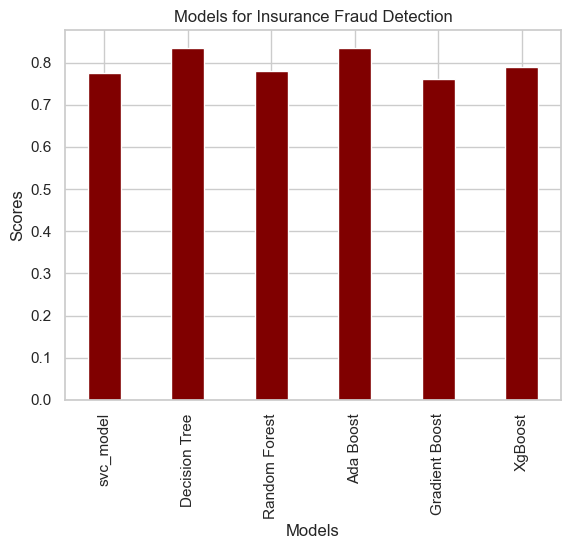

In [67]:
plt.bar(models['Model'],models['Score'], width=0.4, color='maroon')
plt.xlabel("Models")
plt.xticks(rotation=90)
plt.ylabel("Scores")
plt.title("Models for Insurance Fraud Detection")
plt.show()

Above a list of each algorithm, the bar chart shows that the spread of the accuracy scores across each cross validation fold for each algorithm.
It is clear that the Decision Tree or Ada Boost is good enough for both feature selection (83% and 83% accuracy) as model selection.